In [1]:
import typing as tp
from matplotlib import pyplot as plt


import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse; rmse = lambda *x: mse(*x)**0.5


from custome import DataFrameHandler, CrossValSampler, get_Xy

In [2]:
# Global const.
TRAIN_TO_ALL_DATA_RATION = 8 / 10
DROP_COLUMNS = ['sex', 'smoker', 'region']
CHECK_COLUMNS = ['female', 'male', 'southwest', 'southeast', 'northwest', 'northeast']
STATISTICS_COUNT_COLUMNS = [
    'age', 'bmi', 'children', 'charges', 'female', 'male', 'northeast', 'northwest', 'southeast', 'southwest'
]

In [3]:
data_handler = DataFrameHandler()

# Load all data and shuffle it.
df = pd.read_csv('insurance.csv')
df = df.sample(df.shape[0], random_state=7).reset_index(drop=True)

train_len = round(df.shape[0] * TRAIN_TO_ALL_DATA_RATION)

# Devide all data to train/test parts.
train_df = df.iloc[:train_len]
test_df = df.iloc[train_len:]

# Prepare data.
train_df = data_handler.prepare_dataset(train_df, DROP_COLUMNS, CHECK_COLUMNS)
train_statistics = data_handler.count_statistics(train_df, STATISTICS_COUNT_COLUMNS)
train_df = data_handler.normalize_dataset(train_df, train_statistics)

test_df = data_handler.prepare_dataset(test_df, DROP_COLUMNS, CHECK_COLUMNS)
test_df = data_handler.normalize_dataset(test_df, train_statistics)

In [4]:
X, y = get_Xy(train_df, target_name="charges")

In [5]:
train_val_sampler = CrossValSampler(X, y, val_size=75)

In [6]:
history = []
for train, val in tqdm(train_val_sampler, total=train_val_sampler.folds_num):
    X_train, y_train = train
    X_val, y_val = val
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = rmse(y_val, y_pred)
    history.append(score)

  0%|          | 0/14 [00:00<?, ?it/s]

0.9453303423417774


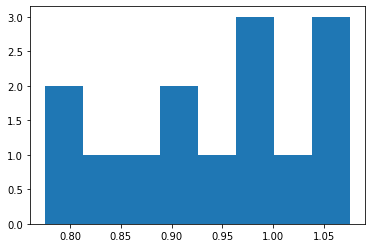

In [7]:
plt.hist(history, bins=8)
print(np.mean(history))

In [8]:
import json

with open('history_classic.json', 'w') as f:
    json.dump(history, f)

In [9]:
train_val_sampler = CrossValSampler(X, y, val_size=300)

train, val = train_val_sampler()
X_train, y_train = train
X_val, y_val = val

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
rmse(y_val, y_pred)

0.9334084192241145

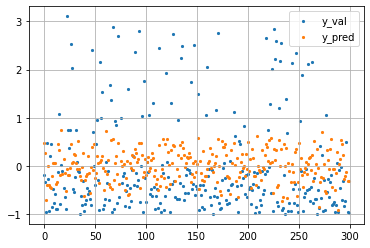

In [10]:
plt.scatter(range(len(y_val)), y_val, 4.5, label='y_val')
plt.scatter(range(len(y_val)), y_pred, 4.5, label='y_pred')
plt.legend()
plt.grid();

In [11]:
for w in model.coef_:
    print("%.4f" % w)

0.2326
0.1811
0.0422
3230213507007.5879
3230213507007.6377
40252961818141.6641
40144642422642.7734
41892868117024.1719
41032094976722.2969


In [12]:
X_test, y_test = get_Xy(test_df, target_name="charges")

In [13]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)

In [14]:
score = rmse(y_test, y_pred)
score

0.8819350790631854

In [15]:
with open('classic_y_test_prediction.json', 'w') as f:
    json.dump(list(y_pred), f)